In [58]:
import glob  # For file path pattern matching
import email  # For handling email data
from bs4 import BeautifulSoup  # For HTML parsing
from concurrent.futures import ThreadPoolExecutor  # For parallel execution

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization

import nltk  # Natural Language Toolkit
from nltk.tokenize import sent_tokenize, word_tokenize  # Tokenization
from nltk.stem import PorterStemmer, WordNetLemmatizer  # Stemming and lemmatization
from nltk.corpus import stopwords  # Stopword removal
from nltk.download import punkt, wordnet, stopwords  # Downloading NLTK resources

from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.feature_extraction.text import CountVectorizer  # For text feature extraction
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation metrics

import tensorflow as tf  # Deep learning framework
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding  # Layers for building models
from tensorflow.keras.models import Sequential  # Sequential model
from tensorflow.keras.optimizers import Adam  # Optimization algorithm
from tensorflow.keras.callbacks import EarlyStopping  # Early stopping for model training

# Download the necessary NLTK resources
nltk.download('punkt')  # Tokenization resources
nltk.download('wordnet')  # Lemmatization resources
nltk.download('stopwords')  # Stopword resources


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


False

## File folder path.

In [2]:
PATH = 'dataset/'
ham_path = PATH + 'ham/'
spam_path = PATH + 'spam/'

### Parsing email and extracting the payload of the email.

In [3]:
def parse_email(file_path):
    with open(file_path, 'rb') as file:
        email_content = file.read()
        parsed_email = email.message_from_bytes(email_content)
        text_body = None
        html_body = None

        # Check if the email is multipart
        if parsed_email.is_multipart():
            # Iterate over email parts
            for part in parsed_email.get_payload():
                # Extract text/plain data only
                if part.get_content_type() == 'text/plain':
                    text_body = part.get_payload(decode='utf-8').decode(errors='replace')
                elif part.get_content_type() == 'text/html':
                    html_body = part.get_payload(decode=True).decode(errors='replace')
        
            # Prefer text/plain over text/html
            email_body = text_body if text_body is not None else html_body
            # If email_body is HTML, convert it to plain text
            if email_body is not None and html_body is not None:
                email_body = BeautifulSoup(email_body, 'html.parser').get_text()
        else:
            # If not multipart, just extract the payload
            email_body = parsed_email.get_payload(decode=True).decode(errors='replace')

        email_subject = parsed_email.get('Subject')

        # If no body could be extracted, print the file path
        if email_body is None:
            print(f"No body could be extracted from email at {file_path}")

        return email_subject, email_body


### Process the file 

In [4]:
# Generator function to process the files in the given directory
def process_files_gen(directory):
    file_paths = glob.glob(directory + '/*')
    with ThreadPoolExecutor() as executor:
        for result in executor.map(parse_email, file_paths):
            yield result


### Creating the DataFrame 

In [5]:

# Use the generator to create a DataFrame
def create_dataframe(directory, label):
    generator = process_files_gen(directory)
    df = pd.DataFrame(generator, columns=['Subject','Body']).assign(Category=label)
    return df



# Creating dataframe instances for 'ham' and 'spam'.

In [6]:
# Create dataframes for both the spam and non-spam emails
df_ham = create_dataframe(ham_path, 'ham')
df_spam = create_dataframe(spam_path, 'spam')

# Concatenate the two dataframes
df = pd.concat([df_ham, df_spam])

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)


/var/folders/1n/4n926d913_94f_hb0lp693200000gn/T/ipykernel_45076/595207459.py:22: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  email_body = BeautifulSoup(email_body, 'html.parser').get_text()


No body could be extracted from email at dataset/ham/00240.8623673c2a6f2cde10ab31423f708feb
No body could be extracted from email at dataset/ham/00869.0fbb783356f6875063681dc49cfcb1eb
No body could be extracted from email at dataset/ham/00150.6757acfba013e1e9b138e2530101c9b8
No body could be extracted from email at dataset/ham/1219.c4cc23fc1dcc1809a3dc65c58fc51d65
No body could be extracted from email at dataset/ham/01137.862bf0c202b134ec11c965d1a46a43a0
No body could be extracted from email at dataset/ham/00720.b32e7900b189a55cf7207e9633f5c437
No body could be extracted from email at dataset/spam/00182.5561cb1b6f968e83afabe21d7a28bb37
No body could be extracted from email at dataset/spam/00977.6b7587a392363b73c8312b72b4972c24
No body could be extracted from email at dataset/spam/01188.67d69a8d6e5c899914556488c8cbd2c9
No body could be extracted from email at dataset/spam/00341.99b463b92346291f5848137f4a253966


/var/folders/1n/4n926d913_94f_hb0lp693200000gn/T/ipykernel_45076/595207459.py:22: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  email_body = BeautifulSoup(email_body, 'html.parser').get_text()
/var/folders/1n/4n926d913_94f_hb0lp693200000gn/T/ipykernel_45076/595207459.py:22: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  email_body = BeautifulSoup(email_body, 'html.parser').get_text()


No body could be extracted from email at dataset/spam/01317.2fb1c15091162a0a83cb7020e45e8de6
No body could be extracted from email at dataset/spam/00398.64f68a9650595170b0e10cc493020a0a
No body could be extracted from email at dataset/spam/00239.2f1370f9cba5ab21297eadb2af40b051
No body could be extracted from email at dataset/spam/00217.f56a722e95d0b6ea580f1b4e9e2e013a
No body could be extracted from email at dataset/spam/00311.9797029f3ee441b00f3b7521e573cb96
No body could be extracted from email at dataset/spam/00457.f4325a4aa30dce61bf6c442b887733dd
No body could be extracted from email at dataset/spam/00215.0378888fa9823523e61a6b922a4e3b55
No body could be extracted from email at dataset/spam/00200.2fcabc2b58baa0ebc051e3ea3dfafd8f
No body could be extracted from email at dataset/spam/01306.d37be8871ac501758c6854fbef9cbdd2
No body could be extracted from email at dataset/spam/00773.1ef75674804a6206f957afddcb5ed0c1
No body could be extracted from email at dataset/spam/01041.1ece6e061e

## Basic EDA and Text pre-processing.

In [7]:
# cheking the dataset.
df.head()

,Subject,Body,Category
0,Re: Nessus?,"On Mon, Oct 07, 2002 at 11:05:21PM +0200, Matt...",ham
1,work from home. free info,WE NEED HELP. We are a 14 year old fortune 50...,spam
2,Benjamin Wallace Higgins,\nAt 12:45 am Benjamin Wallace Higgins made a ...,ham
3,Re: [Baseline] Raising chickens the high-tech way,Dave Long <dl@silcom.com> writes:\n\n> > It al...,ham
4,[zzzzteana] Plumstead Panther - Pictures!,Looks and sounds a hell of a lot like Clare's ...,ham


In [8]:
df.shape

(8597, 3)

In [9]:
df.isnull().sum()


Subject      6
Body        43
Category     0
dtype: int64

In [10]:
df = df.dropna()
df.isnull().sum()

Subject     0
Body        0
Category    0
dtype: int64

In [11]:
df.groupby('Category').describe()

Subject                                      Body         \
           count unique                     top freq count unique   
Category                                                            
ham         6689   2629  [Spambayes] Deployment   54  6689   4178   
spam        1859   1658                           12  1859   1710   

                                                                  
                                                        top freq  
Category                                                          
ham       E-mail error\n\nYou're subscribed to the HTML ...    9  
spam      \nHello I am your hot lil horny toy.\n    I am...    7

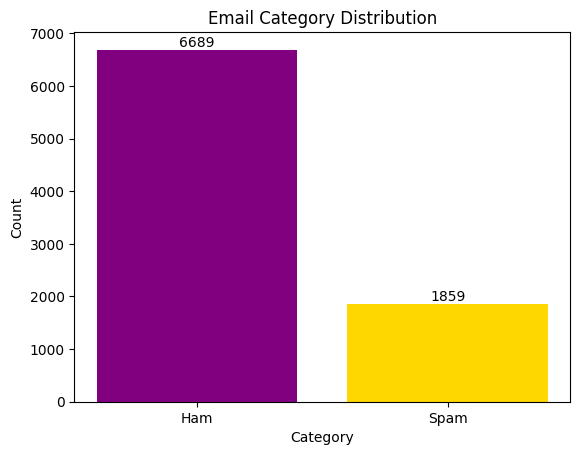

In [12]:
# checking the distribution of the dataset.
labels = ["Ham", "Spam"]
sizes = df["Category"].value_counts()
colors = ["#800080", "#FFD700"]  # Purple and Gold


plt.bar(labels, sizes, color=colors)

# Add annotations to the bars
for i, size in enumerate(sizes):
    plt.text(i, size, str(size), ha='center', va='bottom')

plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Email Category Distribution")
plt.show()


### Observation:
 -  The number of Ham and Spam emails has significant difference
 -  The dataset is imbalanced.
 -  So for next step we will be balancing the dataset.

### Changing the categorical labels into binary values.

In [13]:
df['is_spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

### Balancing the dataset.

In [14]:
# Filter the DataFrame for 'spam' and 'ham' samples
ham_samples = df[df['Category'] == 'ham']
spam_samples = df[df['Category'] == 'spam']

# Determine the minimum sample size
sample_size = min(len(ham_samples), len(spam_samples))

# Randomly sample equal number of 'spam' and 'ham' samples
ham_samples = ham_samples.sample(n=sample_size, random_state=42)
spam_samples = spam_samples.sample(n=sample_size, random_state=42)

# Concatenate the samples
df = pd.concat([ham_samples, spam_samples], ignore_index=True)

# Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# View samples
df.sample(5), df.shape


(                                                Subject  \
 9                                        Latina Teens!!   
 188   [ILUG] WE NEED YOUR ASSISTANCE TO INVEST IN YO...   
 2352                                     Re: Wifi query   
 2872   Is Your Mortgage Payment Too High? Reduce It Now   
 146                         [IIU] spyware calling home?   
 
                                                    Body Category  is_spam  
 9     <html>\n<body>\n<p>See These Sweet Latina Hone...     spam        1  
 188   Dear Sir/Madam,\n\nI am well confident of your...     spam        1  
 2352  802.11b - 11Mbps per channel over three channe...      ham        0  
 2872  <!-- saved from url=(0022)http://internet.e-ma...     spam        1  
 146   Hello all\nI'm looking for advice. My pc has d...      ham        0  ,
 (3718, 4))

### Email category distribution after undersampling.

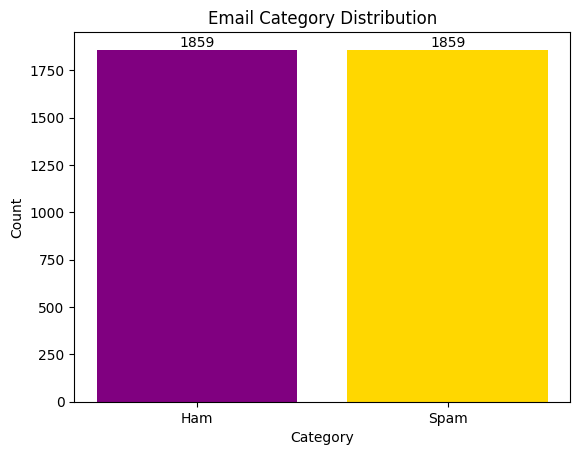

In [15]:
labels = ["Ham", "Spam"]
sizes = df["Category"].value_counts()
colors = ["#800080", "#FFD700"]  # Purple and Gold

plt.bar(labels, sizes, color=colors)

# Add annotations to the bars
for i, size in enumerate(sizes):
    plt.text(i, size, str(size), ha='center', va='bottom')

plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Email Category Distribution")
plt.show()

### The following email wrapper function is to check the texts after each text preprocessing to see the changes.

In [16]:

def print_random_wrapped_emails(df, body, subject, num_samples=3):
    """
    Prints wrapped content of randomly selected email samples from a DataFrame
    along with their labels and a count.
    
    @df: DataFrame containing email samples
    @num_samples: number of samples to print (default is 5)
    """
    random_indices = random.sample(range(len(df)), num_samples)
    for i, index in enumerate(random_indices, 1):
        email_body_sample = df[body].iloc[index]
        email_subject_sample = df[subject].iloc[index]
        label = df['Category'].iloc[index]
        wrapped_email = textwrap.fill(f'Subject : {email_subject_sample}, Body: {email_body_sample}')
        print(f"Sample {i}:")
        print(f"Label: {label}")
        print(f"Count: {index+1}")
        print(wrapped_email)
        print('-+' * 50)  # Print separator between email samples

In [17]:
print_random_wrapped_emails(df,'Body' , 'Subject',num_samples=4)

Sample 1:
Label: ham
Count: 2108
Subject : Re: [SAdev] SpamAssassin v2.40 released (finally)!, Body: On
Mon, Sep 02, 2002 at 06:53:24PM +0100, Justin Mason wrote: >   - Razor
v2 now supported fully  <grrr>  Who changed my code?    Dns.pm and
Reporter.pm WRT Razor have pointers to $Mail::SpamAssassin::DEBUG,
whereas it should be $Mail::SpamAssassin::DEBUG->{enabled}...  I'll be
submitting a bug/patch for this shortly.  --  Randomly Generated
Tagline: MA Driving #2: Everything is under construction.
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Sample 2:
Label: ham
Count: 1890
Subject : Re: JPEGs patented, Body: Wayne E Baisley wrote: > There's
nothing you can know that isn't known. > Nothing you can see that
isn't shown. > Nowhere you can be that isn't where you're meant to be.
> It's easy. > All you need is HTML.  Are you quoting the Beatles
version or the Laibach version?  - Joe :-)
http://xent.com/mailman/listinfo/fork
-+-+-+-+-+

### Observations:
- We can see lot of HTML Tags, Special Characters and Hyperlinks URLS
- Next step, we will be removing and normalizing the text data.

In [18]:
df.head(), df.Body[10]

(                                             Subject  \
 0         Re: [SAtalk] Removing SPAM: from SA notice   
 1                                   Funds Investment   
 2                                  Re: Your VIP Pass   
 3        Something for the person who has everything   
 4  [WM] ADV:  Direct email blaster, email address...   
 
                                                 Body Category  is_spam  
 0  \n"Christopher Crowley" said:\n\n> That says t...      ham        0  
 1  SENIOR ADVOCATE OF NIGERIA \nBARR. WILLIAMS FA...     spam        1  
 2  ###################################\n\n  FREE ...     spam        1  
 3  \nInteresting ebay item......(and no it wasnt ...      ham        0  
 4  <BODY bgColor=#ffffff>\n<DIV><FONT face=&#2343...     spam        1  ,
 "I hope you all don't mind me creating a new thread and adding a Cc: to\nspamassassin-devel.  I want to make sure everyone reads Craig's email.\n(I don't really have any comments other than to endorse it and su

### Observing two different URLs patterns.
- We will be droo

In [19]:

#checking the counts of ulrs in the dataset.
urls = []

for body in df['Body']:
    matches = re.findall(r'(http|https)://[^\s]*', str(body), flags=re.IGNORECASE)
    urls.extend(matches)

print(len(urls))


15029


In [20]:

#checking the counts of ulrs starting with wwwin the dataset.
urls = []

for body in df['Body']:
    matches = re.findall(r'www\.[^\s]*', str(body))
    urls.extend(matches)

print(len(urls))


7834


### Text - Preprocessing.

In [21]:

def process_email(content) :
    '''
    preprocesses the content of an email 
    
    and returns a dictionary with word as key and its frequency as value
    @content : email content (a string)
    @return : a counting dictionary 
    '''                                         
    if not isinstance(content,str) :       
        return {},''
    content = re.sub(r'<[^<>]+>', ' ',content)  ##strip all HTML
    content = str.lower(content) ##lower case
    #handle URLS with http:// or https://
    content = re.sub(r'(http|https)://[^\s]*','httpaddr ',content) 
    content = re.sub(r'www\.[^\s]*','httpaddr ',content) #handle URLS with www.
    #handle email addresses
    #look for strings with @ in the middle
    content = re.sub(r'[^\s]+@[^\s]+','emailaddr',content)
    content = re.sub(r'[0-9]+', 'number ',content) #handle numbers
    content = re.sub(r'[$]+','dollar ',content) #handle $ sign 
    content = re.sub(r'[\n]+',' ',content) #remove \n
    content = re.sub(r'[{0}]'.format(string.punctuation),' ',content) 

    return content

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


In [22]:
df['clean_subject'] = df['Subject'].apply(process_email).to_numpy()

In [23]:
df['clean_body'] = df['Body'].apply(process_email).to_numpy()

In [24]:
df.head(5), df.shape

(                                             Subject  \
 0         Re: [SAtalk] Removing SPAM: from SA notice   
 1                                   Funds Investment   
 2                                  Re: Your VIP Pass   
 3        Something for the person who has everything   
 4  [WM] ADV:  Direct email blaster, email address...   
 
                                                 Body Category  is_spam  \
 0  \n"Christopher Crowley" said:\n\n> That says t...      ham        0   
 1  SENIOR ADVOCATE OF NIGERIA \nBARR. WILLIAMS FA...     spam        1   
 2  ###################################\n\n  FREE ...     spam        1   
 3  \nInteresting ebay item......(and no it wasnt ...      ham        0   
 4  <BODY bgColor=#ffffff>\n<DIV><FONT face=&#2343...     spam        1   
 
                                        clean_subject  \
 0         re   satalk  removing spam  from sa notice   
 1                                   funds investment   
 2                               

In [25]:
print_random_wrapped_emails(df,'clean_body' , 'clean_subject',num_samples=4)

Sample 1:
Label: ham
Count: 2621
Subject :  spambayes  test sets , Body:     but it also identified as
spam everything in my inbox that had any     mime structure or html
parts  and several messages in my saved  zope     geeks  list that
happened to be using mime and or html       do you know why   the
strangest implied claim there is that it hates mime   independent of
html   for example  the spamprob of  content type text plain    in
that pickle is under number  number     content type multipart
alternative  gets   number  number   but that s not a killer clue  and
one bit of good content will more   than cancel it out  i reran the
experiment  with the new spamhamnumber  pik  but it doesn t seem to
make a difference    here are the clues for the two spams in my inbox
in hammie py s output format  which sorts the clues by probability
the first two numbers are the message number and overall probability
then line folded       number  number  number  s  facility   number
number    speake

### Observations:
- We observed, there are no more urls and hyper links and all the letters have been lower cased.
- There are no special characters and punctuations have been removed.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Subject        3718 non-null   object
 1   Body           3718 non-null   object
 2   Category       3718 non-null   object
 3   is_spam        3718 non-null   int64 
 4   clean_subject  3718 non-null   object
 5   clean_body     3718 non-null   object
dtypes: int64(1), object(5)
memory usage: 174.4+ KB


In [27]:
df['clean_subject'] = df['clean_subject'].astype(str)
df['clean_body'] = df['clean_body'].astype(str)
df['is_spam'] = df['is_spam'].astype(float)
df['clean_email_content'] = df.apply(lambda row: row['clean_subject'] + " " + row['clean_body'], axis=1)

In [28]:
df['clean_email_content'].head(5)

0    re   satalk  removing spam  from sa notice   c...
1    funds investment senior advocate of nigeria  b...
2    re  your vip pass                             ...
3    something for the person who has everything  i...
4     wm  adv   direct email blaster  email address...
Name: clean_email_content, dtype: object

In [29]:
df.head()

,Subject,Body,Category,is_spam,clean_subject,clean_body,clean_email_content
0,Re: [SAtalk] Removing SPAM: from SA notice,"\n""Christopher Crowley"" said:\n\n> That says t...",ham,0.0,re satalk removing spam from sa notice,christopher crowley said that says that ...,re satalk removing spam from sa notice c...
1,Funds Investment,SENIOR ADVOCATE OF NIGERIA \nBARR. WILLIAMS FA...,spam,1.0,funds investment,senior advocate of nigeria barr williams fal...,funds investment senior advocate of nigeria b...
2,Re: Your VIP Pass,###################################\n\n FREE ...,spam,1.0,re your vip pass,free adu...,re your vip pass ...
3,Something for the person who has everything,\nInteresting ebay item......(and no it wasnt ...,ham,0.0,something for the person who has everything,interesting ebay item and no it wasnt m...,something for the person who has everything i...
4,"[WM] ADV: Direct email blaster, email address...",<BODY bgColor=#ffffff>\n<DIV><FONT face=&#2343...,spam,1.0,wm adv direct email blaster email address...,direct email blaster the pr...,wm adv direct email blaster email address...


In [30]:
df.isna().sum()

Subject                0
Body                   0
Category               0
is_spam                0
clean_subject          0
clean_body             0
clean_email_content    0
dtype: int64

In [31]:
df.head()

,Subject,Body,Category,is_spam,clean_subject,clean_body,clean_email_content
0,Re: [SAtalk] Removing SPAM: from SA notice,"\n""Christopher Crowley"" said:\n\n> That says t...",ham,0.0,re satalk removing spam from sa notice,christopher crowley said that says that ...,re satalk removing spam from sa notice c...
1,Funds Investment,SENIOR ADVOCATE OF NIGERIA \nBARR. WILLIAMS FA...,spam,1.0,funds investment,senior advocate of nigeria barr williams fal...,funds investment senior advocate of nigeria b...
2,Re: Your VIP Pass,###################################\n\n FREE ...,spam,1.0,re your vip pass,free adu...,re your vip pass ...
3,Something for the person who has everything,\nInteresting ebay item......(and no it wasnt ...,ham,0.0,something for the person who has everything,interesting ebay item and no it wasnt m...,something for the person who has everything i...
4,"[WM] ADV: Direct email blaster, email address...",<BODY bgColor=#ffffff>\n<DIV><FONT face=&#2343...,spam,1.0,wm adv direct email blaster email address...,direct email blaster the pr...,wm adv direct email blaster email address...


#### Tokenization, Removal of Stopwords and Lemmatization.

In [74]:
# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
# Function to tokenize and lemmatize a string, then join it back into a string
def token_lemmatize(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return ' '.join(lemmatized_tokens)

# Apply the function to the 'clean_body' column
df['token_lemmatize'] = df['clean_body'].apply(token_lemmatize)


[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


In [75]:
df.tail()

,Subject,Body,Category,is_spam,clean_subject,clean_body,clean_email_content,token_lemmatize
3713,[Spambayes] Current histograms,We've not only reduced the f-p and f-n rates i...,ham,0.0,spambayes current histograms,we ve not only reduced the f p and f n rates i...,spambayes current histograms we ve not only ...,reduced f p f n rate test run also made score ...
3714,Re: [ILUG] Serial number in hosts file,Ray Dermody's [DERMODYR@ITCARLOW.IE] 20 lines ...,ham,0.0,re ilug serial number in hosts file,ray dermody s emailaddr number lines of wisdo...,re ilug serial number in hosts file ray der...,ray dermody emailaddr number line wisdom inclu...
3715,Radio gives mighty roar to quiet cars,"URL: http://www.newsisfree.com/click/-6,810696...",ham,0.0,radio gives mighty roar to quiet cars,url httpaddr date not supplied a patented s...,radio gives mighty roar to quiet cars url htt...,url httpaddr date supplied patented system all...
3716,"Bigger, Fuller Breasts Naturally In Just Weeks...",<html>\n<head></head>\n<body bgcolor = pink>\n...,spam,1.0,bigger fuller breasts naturally in just weeks...,for women ages number to number plus...,bigger fuller breasts naturally in just weeks...,woman age number number plus seen tv safely ma...
3717,Your Commissions of $5000 per WEEK! ssva,Give me 5 minutes and I will show you how\nto ...,spam,1.0,your commissions of dollar number per week ssva,give me number minutes and i will show you ho...,your commissions of dollar number per week s...,give number minute show turn computer cash mac...


## CLASSIFIER MODELS

#### MODEL 1: Navie  Bayes Classifier

Training Accuracy: 0.9932735426008968
Validation Accuracy: 0.9663978494623656
Test Accuracy: 0.9825268817204301
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       366
         1.0       0.99      0.98      0.98       378

    accuracy                           0.98       744
   macro avg       0.98      0.98      0.98       744
weighted avg       0.98      0.98      0.98       744

[[362   4]
 [  9 369]]


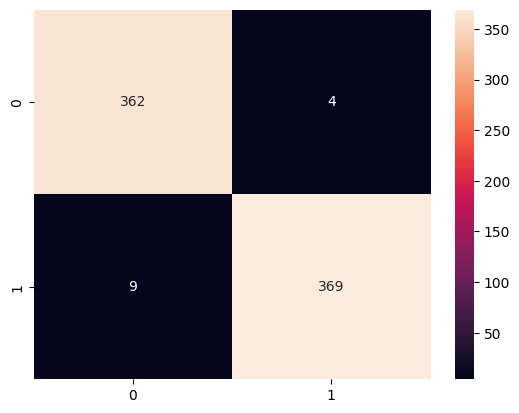

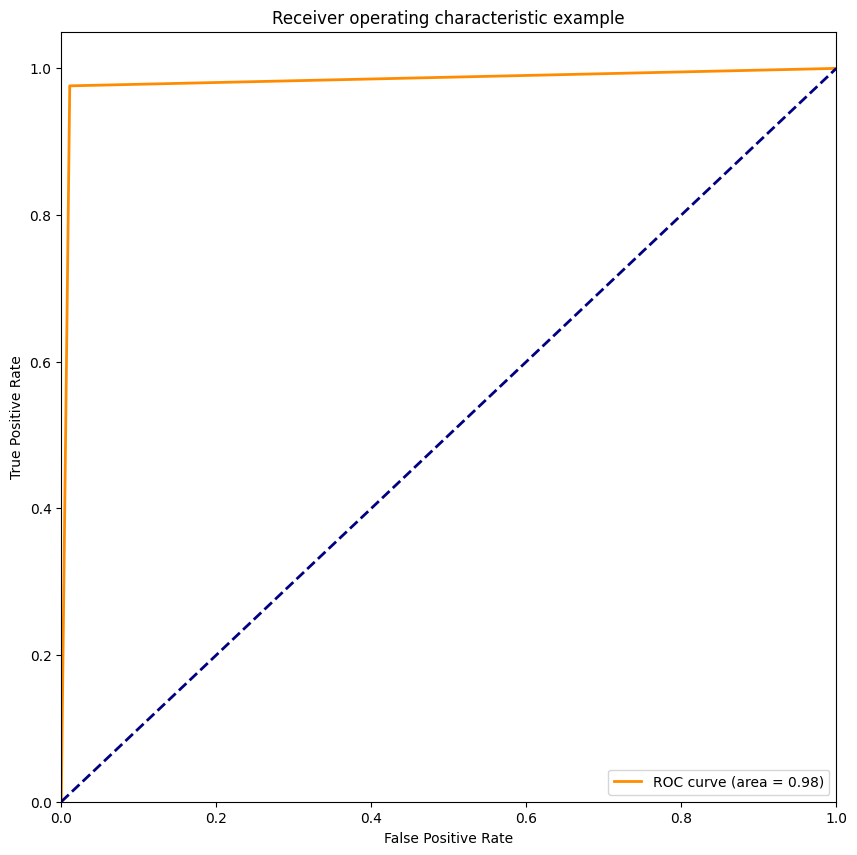

In [76]:

# Split the data into training, validation, and test sets 
X_train, X_val_test, y_train, y_val_test = train_test_split(df['clean_email_content'], df['is_spam'], test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# create a bag-of-words representation of the text data.
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the validation and test data
X_val_vectorized = vectorizer.transform(X_val)
X_test_vectorized = vectorizer.transform(X_test)

# Create an instance of the Naive Bayes classifier (MultinomialNB)
classifier = MultinomialNB()

# Train the classifier on the vectorized training data
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the training, validation, and test data
y_train_pred = classifier.predict(X_train_vectorized)
y_val_pred = classifier.predict(X_val_vectorized)
y_test_pred = classifier.predict(X_test_vectorized)

# Calculate the accuracy on each dataset
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

# Print the classification report
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_test_pred))

# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')

# plot roc-auc curve 
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Observations:
- High Accuracy: The model achieves high accuracy across all three sets: training accuracy of 99.33%, validation accuracy of 96.64%, and test accuracy of 98.25%. This indicates that the model is performing well in terms of correctly classifying as spam and ham messages.
- Precision and Recall: The precision and recall for both classes (0 and 1) are quite high, with values ranging from 0.98 to 0.99. This suggests that the model is effective in identifying both spam andham messages, as indicated by the high precision (ability to correctly identify positive cases) and recall (ability to capture all positive cases) values.
- F1-Score: The F1-score, which combines precision and recall, is also high for both classes, with values around 0.98. This implies a good balance between precision and recall, indicating a robust performance of the model in classifying spam and ham messages.
- Confusion Matrix: The confusion matrix shows the number of true positives (369), true negatives (362), false positives (4), and false negatives (9). The majority of the messages are correctly classified, as indicated by the high number of true positives and true negatives. However, there are a few false positives and false negatives, indicating instances where the model misclassified spam or ham messages.
- Overall, the model exhibits strong performance, achieving high accuracy and precision-recall values. However, the presence of some false positives and false negatives suggests that there is still room for improvement in correctly identifying certain messages. Further analysis and potential adjustments to the model or data preprocessing could help enhance its performance.

#### MODEL 2: LINEAR SVM

Training Accuracy: 1.0
Validation Accuracy: 0.9704301075268817
Test Accuracy: 0.9771505376344086
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       366
         1.0       0.99      0.96      0.98       378

    accuracy                           0.98       744
   macro avg       0.98      0.98      0.98       744
weighted avg       0.98      0.98      0.98       744

[[363   3]
 [ 14 364]]


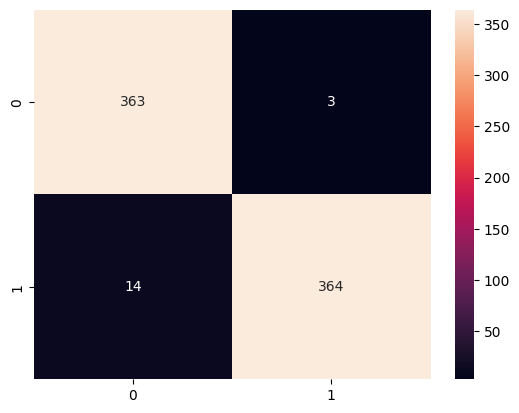

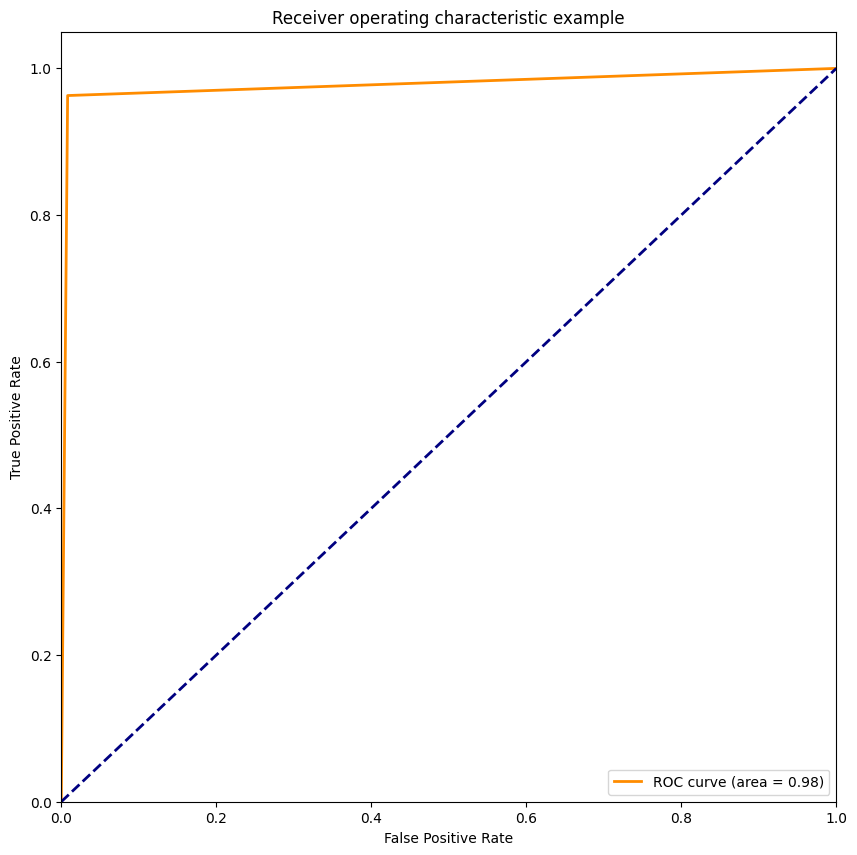

In [77]:
# Create an instance of the SVM classifier (SVC)
classifier = SVC(kernel='linear')

# Train the classifier on the vectorized training data
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the training, validation, and test data
y_train_pred = classifier.predict(X_train_vectorized)
y_val_pred = classifier.predict(X_val_vectorized)
y_test_pred = classifier.predict(X_test_vectorized)

# Calculate the accuracy on each dataset
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

# Print the classification report
print(classification_report(y_test, y_test_pred))

# print confusion matrix
print(confusion_matrix(y_test, y_test_pred))

# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# Observations:
- High Accuracy: The model achieves high accuracy across all three sets: training accuracy of 100%, validation accuracy of 97.04%, and test accuracy of 97.71%. This indicates that the model is performing well in terms of correctly classifying spam and ham messages.
- Precision and Recall: The precision and recall for both classes (0 and 1) are quite high, with values ranging from 0.96 to 0.99. This suggests that the model is effective in identifying both spam and ham messages, as indicated by the high precision (ability to correctly identify positive cases) and recall (ability to capture all positive cases) values.
- F1-Score: The F1-score, which combines precision and recall, is also high for both classes, with values around 0.98. This implies a good balance between precision and recall, indicating a robust performance of the model in classifying spam and ham messages.
- Confusion Matrix: The confusion matrix shows the number of true positives (364), true negatives (363), false positives (3), and false negatives (14). The majority of the messages are correctly classified, as indicated by the high number of true positives and true negatives. However, there are a few false positives and false negatives, indicating instances where the model misclassified spam or ham messages.

## MODEL 3: LSTM

In [80]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size = 10000

one_hot_doc=[one_hot(words, n = vocab_size)
           for words in df['token_lemmatize']
           ]


In [81]:
df['token_lemmatize'].describe().T

count                                                  3718
unique                                                 3143
top       creditfix thank email address obtained purchas...
freq                                                     11
Name: token_lemmatize, dtype: object

In [82]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentence_len = 300
embedded_doc = pad_sequences(
    one_hot_doc,
    maxlen = sentence_len,
    padding="pre"
)

In [83]:
extract_features = pd.DataFrame(
    data = embedded_doc
)
target=df["is_spam"]

In [84]:
df_final = pd.concat([extract_features,target],axis=1)

In [85]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,is_spam
0,0,0,0,0,0,0,0,0,0,0,...,9231,2983,4922,6518,3603,8105,1783,6015,4922,0.0
1,0,0,0,0,0,0,0,0,0,0,...,1310,5491,8707,3925,7495,7252,6453,5989,4922,1.0
2,0,0,0,0,0,0,0,0,0,0,...,5435,1331,8303,6437,7335,759,6606,6422,7272,1.0
3,0,0,0,0,0,0,0,0,0,0,...,888,9025,5564,4271,1102,8862,5173,2322,4922,0.0
4,4443,135,4152,7735,366,6998,5655,1708,5585,7219,...,9231,2983,4922,2034,3603,8105,1783,6015,4922,1.0


In [86]:
X = df_final.drop("is_spam",axis=1)
y = df_final["is_spam"]

In [120]:
X_train_val,X_test,y_train_val,y_test = train_test_split(X, y, random_state=42, test_size=0.45)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=42, test_size=0.50)

In [142]:
# Define the model
lstm_model = Sequential()
feature_num = 1000
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=feature_num, input_length=sentence_len))
lstm_model.add(LSTM(units=128))
lstm_model.add(Dropout(0.4))
lstm_model.add(Dense(units=80, activation='relu'))
lstm_model.add(Dense(units=50, activation='relu'))
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Train the model with tuning options
history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=15, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the test data
loss, accuracy = lstm_model.evaluate(X_test, y_test)

# Print the loss and accuracy obtained
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/15
32/32 [==============================] - 33s 990ms/step - loss: 0.4462 - accuracy: 0.7926 - val_loss: 0.1336 - val_accuracy: 0.9550
Epoch 2/15
32/32 [==============================] - 23s 722ms/step - loss: 0.1389 - accuracy: 0.9697 - val_loss: 0.1291 - val_accuracy: 0.9628
Epoch 3/15
32/32 [==============================] - 20s 635ms/step - loss: 0.0457 - accuracy: 0.9932 - val_loss: 0.1097 - val_accuracy: 0.9726
Epoch 4/15
32/32 [==============================] - 24s 770ms/step - loss: 0.0116 - accuracy: 0.9971 - val_loss: 0.1133 - val_accuracy: 0.9716
Epoch 5/15
32/32 [==============================] - 21s 664ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1193 - val_accuracy: 0.9726
Epoch 6/15
32/32 [==============================] - 19s 591ms/step - loss: 7.8616e-04 - accuracy: 1.0000 - val_loss: 0.1279 - val_accuracy: 0.9706
Epoch 7/15
32/32 [==============================] - 19s 593ms/step - loss: 4.5724e-04 - accuracy: 1.0000 - val_loss: 0.1330 - val_accuracy

In [143]:
y_pred = lstm_model.predict(X_test)
y_pred = (y_pred>0.5)

53/53 [==============================] - 7s 130ms/step


Test Score:97.25%
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       834
         1.0       0.98      0.97      0.97       840

    accuracy                           0.97      1674
   macro avg       0.97      0.97      0.97      1674
weighted avg       0.97      0.97      0.97      1674



array([[814,  20],
       [ 26, 814]])

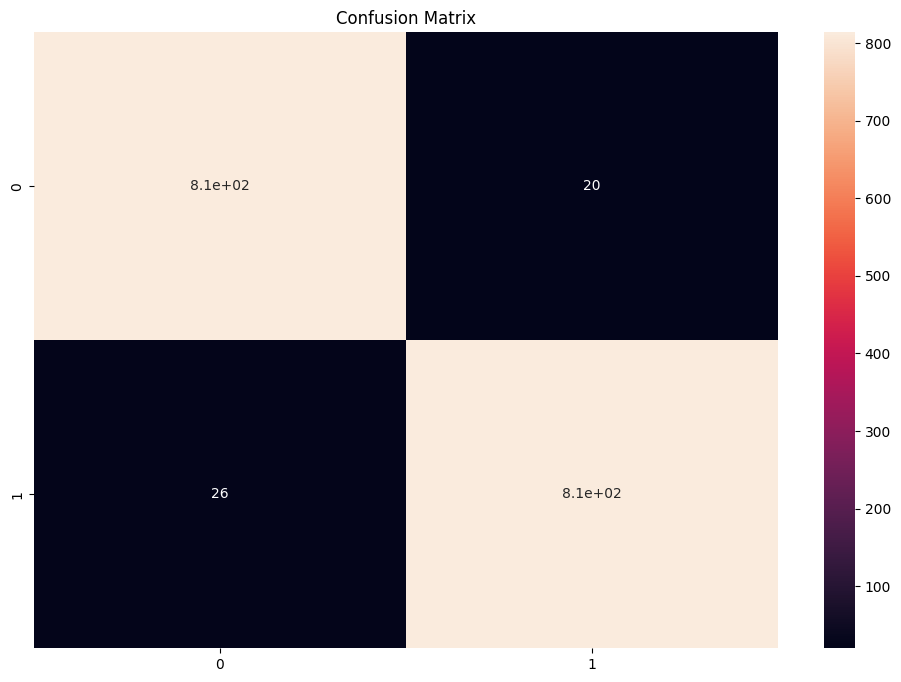

In [145]:
score=accuracy_score(y_test,y_pred)
print("Test Score:{:.2f}%".format(score*100))

# Print the classification report
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
fig = plt.figure(figsize=(12,8))
sns.heatmap(
    cm,
    annot=True,
)
plt.title("Confusion Matrix")
cm

53/53 [==============================] - 8s 145ms/step
ROC-AUC Score: 99.41%
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       834
         1.0       0.98      0.97      0.97       840

    accuracy                           0.97      1674
   macro avg       0.97      0.97      0.97      1674
weighted avg       0.97      0.97      0.97      1674



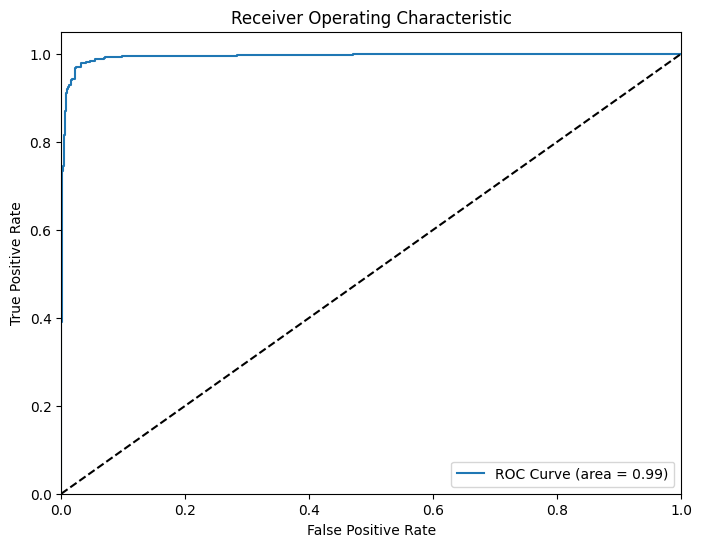

In [147]:

# Calculate the predicted probabilities
y_pred_proba = lstm_model.predict(X_test)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC-AUC Score: {:.2f}%".format(roc_auc * 100))

# Convert probabilities to predicted labels
y_pred = (y_pred_proba > 0.5).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


### Observations:
- The model achieves an impressive ROC-AUC score of 99.41%, indicating its high ability to distinguish between spam and non-spam emails.
- The precision, recall, and F1-scores for both classes (spam and ham) are consistently high, demonstrating the model's effectiveness in accurately classifying emails.
- The overall accuracy of the model is 97%, meaning that it correctly predicts the class for 97% of the test samples.
- The macro-average and weighted-average F1-scores, which provide a balanced measure of the model's performance across both classes, are also at 97%.
In summary, the model exhibits strong performance in classifying spam and ham emails, 
achieving high accuracy and well-balanced precision and recall values. 
The high ROC-AUC score further confirms its ability to effectively discriminate between the two classes.

In [148]:
# Download stopwords if not already downloaded
nltk.download('stopwords')

# Function to classify a message as spam or not
def classify_message(model, message):
    # Tokenize the message into sentences
    sentences = sent_tokenize(message)
    
    # Initialize an empty list to store processed sentences
    processed_sentences = []
    
    # Iterate over each sentence
    for sentence in sentences:
        # Remove special characters and convert to lowercase
        sentence = re.sub("[^a-zA-Z]", " ", sentence.lower())
        
        # Tokenize the sentence into words
        words = word_tokenize(sentence)
        
        # Filter out stopwords and join the remaining words
        filtered_words = [word for word in words if word not in stopwords.words('english')]
        processed_sentence = " ".join(filtered_words)
        
        # Append the processed sentence to the list
        processed_sentences.append(processed_sentence)
    
    # Perform one-hot encoding on the processed sentences
    one_hot_encodings = [one_hot(sentence, n=vocab_size) for sentence in processed_sentences]
    
    # Pad the sequences to have the same length
    padded_sequences = pad_sequences(one_hot_encodings, maxlen=sentence_len, padding='pre')
    
    # Predict the label for the text using the model
    predictions = model.predict(padded_sequences)
    
    # Classify each sentence and print the result
    for i, prediction in enumerate(predictions):
        if prediction > 0.5:
            print(f"Sentence {i+1}: It is a spam")
        else:
            print(f"Sentence {i+1}: It is not a spam")


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


In [160]:
message = "New offer for gaming card in now online visit www.abc.com to get the offer"

In [161]:
classify_message(lstm_model,message)

1/1 [==============================] - 0s 40ms/step
Sentence 1: It is a spam


Naive Bayes, SVM, and LSTM are three different types of classifiers, each with their own strengths and suitable use cases:

- Naive Bayes Classifier: Naive Bayes is a probabilistic classifier that predicts the probability of a sample belonging to a specific class using Bayes' theorem. It assumes that features are conditionally independent given the class label. Naive Bayes classifiers are computationally efficient and work well with high-dimensional data and large datasets. They are commonly used in text classification, spam filtering, sentiment analysis, and document categorization.
- SVM (Support Vector Machine): SVM is a binary classification algorithm that finds an optimal hyperplane in a high-dimensional space to separate classes. It can handle linear and non-linear decision boundaries using different kernel functions. SVM classifiers are effective for high-dimensional data and scenarios where the margin between classes is important. They are widely used in text classification, image recognition, and bioinformatics.
- LSTM (Long Short-Term Memory): LSTM is a type of recurrent neural network (RNN) designed to capture long-term dependencies in sequential data. It is suitable for tasks involving sequences, such as natural language processing, speech recognition, and time series analysis. LSTMs can learn and remember patterns over long sequences, overcoming the limitations of traditional RNNs. They perform well in tasks like sentiment analysis, language translation, and text generation. However we tried to experiment how well would it be able to classify email using binary cross entropy classifier with 97% of accuracy on test data.

Out of three MODELs we experimented, we can assume by the results that Navie Bayes Classifier works the best with 98.25% for the dataset and preprocessing techniques we have used.

## REFRENCES
1. Vidiyala, R. (2020) Detecting spam in emails, Medium. Available at: https://towardsdatascience.com/spam-detection-in-emails-de0398ea3b48 (Accessed: 06 July 2023). 
2. Ngawangchoeda (2021) Spam classifier using LSTM, Kaggle. Available at: https://www.kaggle.com/code/ngawangchoeda/spam-classifier-using-lstm (Accessed: 06 July 2023). 
3. Elhassouni (2021) Spam email classifier (98% accuracy), Kaggle. Available at: https://www.kaggle.com/code/elhassouni/spam-email-classifier-98-accuracy/notebook (Accessed: 06 July 2023). 
4. (No date) GitHub. Available at: https://github.com/ShresthaSudip/SMS_Spam_Detection_DNN_LSTM_BiLSTM/blob/master/NLP_SMS_Spam_Detection_FinalVersion_Downsampling_Dense_LSTM_BiLSTM.ipynb (Accessed: 07 July 2023). 
5. Wonduk (2023a) 📮EDA &amp; ML classification on Spam Email Dataset, Kaggle. Available at: https://www.kaggle.com/code/wonduk/eda-ml-classification-on-spam-email-dataset#2.EDA-on-features-(length-added) (Accessed: 07 July 2023). 